# Analysing Results

To run this experiment, first start by generating 100 configurations (the first is the default configuration, which means 99 are sampled randomly):
```console
lcdb create -w lcdb.workflow.sklearn.LibLinearWorkflow -n 100 -o configs.csv
```
This will create the `config.csv` file.


Then run the experiment using these configurations:
```console
lcdb run --openml-id 3 -w lcdb.workflow.sklearn.LibLinearWorkflow --monotonic --max-evals 100 -t 1800 --initial-configs configs.csv
```
this will create the `results.csv` file.

In [21]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [69]:
# Check the configs.csv to see if the same configuration are indeed evaluated
ip_df = pd.read_csv("configs.csv")
ip_df

,C,class_weight,dual,fit_intercept,intercept_scaling,loss,max_iter,multiclass,penalty,scaler,tol
0,1.000000e+00,balanced,True,True,1.000000,squared_hinge,1000,ovr,l2,none,0.001000
1,4.077438e-06,none,True,True,93.655494,squared_hinge,3967,ovr,l2,minmax,0.052991
2,8.220423e-08,none,False,False,174.495314,squared_hinge,240,ovo-scikit,l2,none,0.371089
3,3.126553e-03,balanced,False,False,1.566395,squared_hinge,151,ovr,l1,minmax,1.168176
4,4.448960e-02,none,True,False,1.509699,hinge,2123,ovr,l2,standardize,0.019328
...,...,...,...,...,...,...,...,...,...,...,...
95,9.496210e-12,none,False,True,4.472017,squared_hinge,118,ovo-scikit,l2,standardize,0.071153
96,1.711960e+02,none,False,True,613.737486,squared_hinge,1001,ovo-scikit,l1,none,0.007181
97,5.114315e-07,balanced,True,True,5.845987,squared_hinge,2527,ovr,l2,minmax,0.086210
98,1.725628e+00,balanced,True,True,35.763188,squared_hinge,2415,ovo-scikit,l2,minmax,1.476203


In [43]:
def prepare_df(df):
    """Prepare the dataframe for analysis. For example, load the arrays/list from json format.
    """
    load_array = lambda x: np.array(json.loads(x.replace("'", '"')))

    columns = ["m:fidelity_values", "m:score_types", "m:score_values"]
    
    for col in columns:
        df[col] = df[col].map(load_array)

    return df

In [45]:
# Load a dataframe with the results
# The dataframe is sorted by `job_id` (increasing) as parallel jobs scheduled asynchronously 
# may be collected in a different order than when they were submitted.
r_df = pd.read_csv("results.csv")
r_df.sort_values("job_id", inplace=True)

r_df = prepare_df(r_df)

r_df

m:fidelity_values
m:score_types
m:score_values


,p:C,p:class_weight,p:dual,p:fit_intercept,p:intercept_scaling,p:loss,p:max_iter,p:multiclass,p:penalty,p:scaler,...,m:score_values,m:time_types,m:time_values,m:dataset_id,m:workflow,m:valid_prop,m:test_prop,m:monotonic,m:valid_seed,m:test_seed
2,1.000000e+00,balanced,True,True,1.000000,squared_hinge,1000,ovr,l2,none,...,"[[[1.0, 0.0], [0.60312, 0.39688], [0.61562, 0....","['fit', 'predict']","[[0.001964092254638672, 0.0002741813659667969]...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
0,4.077438e-06,none,True,True,93.655494,squared_hinge,3967,ovr,l2,minmax,...,"[[[0.5, 0.5], [0.47812, 0.52188], [0.47812, 0....","['fit', 'predict']","[[0.0017080307006835938, 0.0002832412719726562...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
3,8.220423e-08,none,False,False,174.495314,squared_hinge,240,ovo-scikit,l2,none,...,"[[[1.0, 0.0], [0.61562, 0.38438], [0.6125, 0.3...","['fit', 'predict']","[[0.0033369064331054688, 0.0006940364837646484...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
5,3.126553e-03,balanced,False,False,1.566395,squared_hinge,151,ovr,l1,minmax,...,"[[[0.5, 0.5], [0.47812, 0.52188], [0.47812, 0....","['fit', 'predict']","[[0.002902984619140625, 0.0002779960632324219]...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
4,4.448960e-02,none,True,False,1.509699,hinge,2123,ovr,l2,standardize,...,"[[[1.0, 0.0], [0.6, 0.4], [0.6, 0.4]], [[0.913...","['fit', 'predict']","[[0.0017039775848388672, 0.0002908706665039062...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9.496210e-12,none,False,True,4.472017,squared_hinge,118,ovo-scikit,l2,standardize,...,"[[[1.0, 0.0], [0.61562, 0.38438], [0.6125, 0.3...","['fit', 'predict']","[[0.0026979446411132812, 0.0005488395690917969...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
97,1.711960e+02,none,False,True,613.737486,squared_hinge,1001,ovo-scikit,l1,none,...,"[[[1.0, 0.0], [0.64688, 0.35312], [0.70625, 0....","['fit', 'predict']","[[0.0027909278869628906, 0.0005681514739990234...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
95,5.114315e-07,balanced,True,True,5.845987,squared_hinge,2527,ovr,l2,minmax,...,"[[[1.0, 0.0], [0.59062, 0.40938], [0.58438, 0....","['fit', 'predict']","[[0.0015420913696289062, 0.0002219676971435547...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42
99,1.725628e+00,balanced,True,True,35.763188,squared_hinge,2415,ovo-scikit,l2,minmax,...,"[[[0.5, 0.5], [0.48125, 0.51875], [0.48438, 0....","['fit', 'predict']","[[0.003312826156616211, 0.0005681514739990234]...",3,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42


In [46]:
# Check the columns
r_df.columns.to_list()

['p:C',
 'p:class_weight',
 'p:dual',
 'p:fit_intercept',
 'p:intercept_scaling',
 'p:loss',
 'p:max_iter',
 'p:multiclass',
 'p:penalty',
 'p:scaler',
 'p:tol',
 'objective',
 'job_id',
 'm:timestamp_submit',
 'm:timestamp_gather',
 'm:timestamp_start',
 'm:timestamp_end',
 'm:memory',
 'm:fidelity_unit',
 'm:fidelity_values',
 'm:score_types',
 'm:score_values',
 'm:time_types',
 'm:time_values',
 'm:dataset_id',
 'm:workflow',
 'm:valid_prop',
 'm:test_prop',
 'm:monotonic',
 'm:valid_seed',
 'm:test_seed']

/var/folders/l8/8k8c8x8152zc16r3jw25gw0c0000gn/T/ipykernel_45434/190535104.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=np.log(r_df["p:C"].max())), cmap=cmap), label="C")


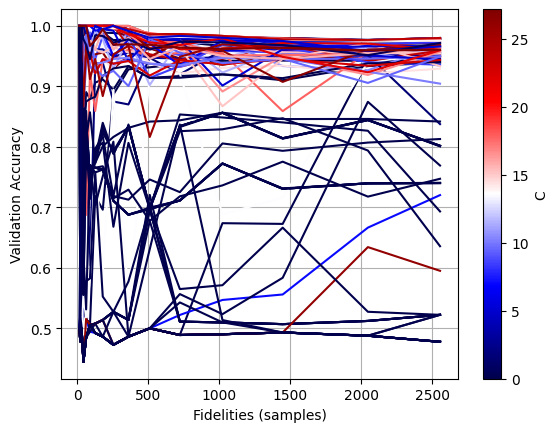

In [67]:
# Meaning of indexes
# fidelities, (train|valid|test), (accuracy|loss)
import matplotlib as mpl

cmap = mpl.colormaps["seismic"]

fig = plt.figure()
for _, row in r_df.iterrows():
    fidelities = row["m:fidelity_values"]
    scores = row["m:score_values"][:,0,0] 
    plt.plot(fidelities, scores, color=cmap(np.log(row["p:C"])/np.log(r_df["p:C"].max())))

plt.xlabel(f"Fidelities ({r_df['m:fidelity_unit'][0]})")
plt.ylabel("Validation Accuracy")

fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=np.log(r_df["p:C"].max())), cmap=cmap), label="C")

plt.grid()
plt.show()

In [60]:
print(r_df["p:C"].min(), r_df["p:C"].max())

1.431832949394878e-12 644191762992.0638


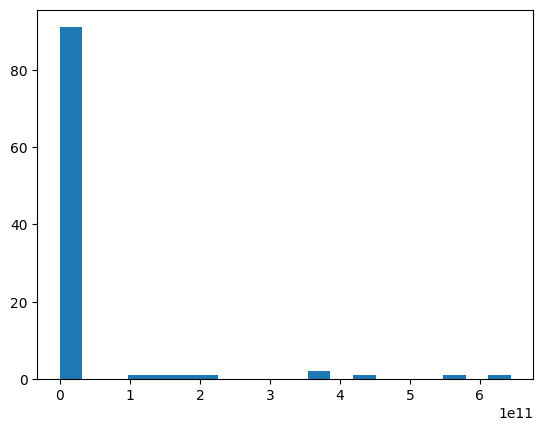

In [68]:
plt.figure()
plt.hist(r_df["p:C"], bins=20)
plt.show()